# Data Mining

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import json

data = pd.read_csv("cleaned_data.csv", index_col=0)
data.drop(data[data["Flavor"]=="Exa.S"].index, inplace=True)
data.drop(data[data["Flavor"].map(lambda s : "VM" in s)].index, inplace=True)
data["Ram"] = data["Ram"].map(int)
data["Vcpu"] = data["Vcpu"].map(int)
data["Disk"] = data["Disk"].map(int)

#data.drop(data[data["Provider"] == "Felcloud"].index  , axis=0 , inplace = True)
#data = data.append(felcloud, ignore_index=True)

In [ ]:
(data.pivot_table(index=["Vcpu" , "Ram"] , columns="Provider" , values= ["Price"] ) ).fillna("-")

Price                            
Provider Felcloud     ovh   oxahost    safozi
Vcpu Ram                                     
1    0          -       -         -  0.020833
     1      0.007       -         -  0.034722
     2     0.0125  0.0296         -         -
     4          -       -  0.036111         -
2    2      0.027       -         -    0.0625
     4      0.081  0.0592         -         -
     6          -       -      0.05         -
     7          -  0.1669         -         -
     8      0.069       -         -         -
     15         -  0.1979         -         -
     30         -  0.2289         -         -
4    2      0.044       -         -         -
     4      0.096       -         -  0.131944
     6       0.12       -         -         -
     8          -  0.1066         -         -
     12         -       -       0.1         -
     15         -  0.3214         -         -
     16     0.098       -         -         -
     60         -  0.4449         -         -
6    4        0.1       -         -         -
     6      0.135       -         -         -
     8      0.165       -         -         -
8    2       0.09       -         -         -
     6      0.152       -         -         -
     8       0.18       -         -         -
     12      0.22       -         -         -
     16       0.3       -  0.172222  0.479167
     30         -  0.6479         -         -
     32      0.19       -         -         -
     120        -  0.8949         -         -
12   8        0.2       -         -         -
     12      0.23       -         -         -
     16      0.34       -         -         -
     48      0.29       -         -         -
16   4       0.18       -         -         -
     12      0.26       -         -         -
     16      0.39       -         -         -
     60         -  1.2649         -         -
     64      0.39       -         -         -
     240        -  1.7579         -         -
24   8        0.3       -         -         -
32   12      0.42       -         -         -
     96      0.69       -         -         -
     120        -  2.4979         -         -
48   24      0.65       -         -         -
     128     0.85       -         -         -

In [ ]:
data.describe()

,Vcpu,Ram,Disk,Price
count,58.000000,58.000000,58.000000,58.000000
mean,10.000000,27.431034,209.568966,0.377274
std,10.975251,43.518946,159.517596,0.539506
min,1.000000,0.000000,10.000000,0.007000
25%,2.000000,4.000000,65.000000,0.096500
50%,7.000000,12.000000,200.000000,0.193950
75%,12.000000,28.500000,300.000000,0.390000
max,48.000000,240.000000,600.000000,2.990900


In [ ]:
for df in data.groupby('Provider') :
    print(df[0] , "\n" , df[1].describe())

Felcloud 
             Vcpu         Ram        Disk      Price
count  31.000000   31.000000   31.000000  31.000000
mean   12.451613   18.935484  263.548387   0.234726
std    12.376964   28.632075  159.907231   0.201435
min     1.000000    1.000000   20.000000   0.007000
25%     4.000000    4.000000  140.000000   0.097000
50%     8.000000    8.000000  220.000000   0.180000
75%    16.000000   16.000000  350.000000   0.300000
max    48.000000  128.000000  600.000000   0.850000
ovh 
             Vcpu         Ram        Disk      Price
count  18.000000   18.000000   18.000000  18.000000
mean    9.055556   52.388889  179.166667   0.750994
std     9.752660   62.192433  151.038075   0.821516
min     1.000000    2.000000   25.000000   0.029600
25%     2.000000    9.750000   50.000000   0.197900
50%     4.000000   30.000000  100.000000   0.413900
75%    14.000000   60.000000  350.000000   0.987150
max    32.000000  240.000000  400.000000   2.990900
oxahost 
            Vcpu        Ram        Dis

In [ ]:
data[['Provider', 'Ram', 'Vcpu' ,'Disk']].groupby('Provider').agg(['count' , 'max', 'min' , 'std' ,'mean'])

Ram                                 Vcpu                     \
         count  max min        std       mean count max min        std   
Provider                                                                 
Felcloud    31  128   1  28.632075  18.935484    31  48   1  12.376964   
ovh         18  240   2  62.192433  52.388889    18  32   1   9.752660   
oxahost      4   16   4   5.507571   9.500000     4   8   1   3.095696   
safozi       5   16   0   6.542171   4.600000     5   8   1   2.949576   

                     Disk                                   
               mean count  max min         std        mean  
Provider                                                    
Felcloud  12.451613    31  600  20  159.907231  263.548387  
ovh        9.055556    18  400  25  151.038075  179.166667  
oxahost    3.750000     4  160  40   52.915026   90.000000  
safozi     3.200000     5  250  10   98.742088   80.000000

In [ ]:
data[['Provider', 'Ram']].groupby('Provider').agg(['count' , 'min', 'max' , 'std' ,'mean'])

Ram                               
         count min  max        std       mean
Provider                                     
Felcloud    31   1  128  28.632075  18.935484
ovh         18   2  240  62.192433  52.388889
oxahost      4   4   16   5.507571   9.500000
safozi       5   0   16   6.542171   4.600000

In [ ]:
data[['Provider', 'Vcpu']].groupby('Provider').agg(['count' ,  'min', 'max'  , 'std' ,'mean'])

Vcpu                              
         count min max        std       mean
Provider                                    
Felcloud    31   1  48  12.376964  12.451613
ovh         18   1  32   9.752660   9.055556
oxahost      4   1   8   3.095696   3.750000
safozi       5   1   8   2.949576   3.200000

In [ ]:
data[['Provider', 'Disk']].groupby('Provider').agg(['count' , 'min', 'max' , 'std' ,'mean'])

Disk                                 
         count min  max         std        mean
Provider                                       
Felcloud    31  20  600  159.907231  263.548387
ovh         18  25  400  151.038075  179.166667
oxahost      4  40  160   52.915026   90.000000
safozi       5  10  250   98.742088   80.000000

<Axes: xlabel='Provider', ylabel='Price'>

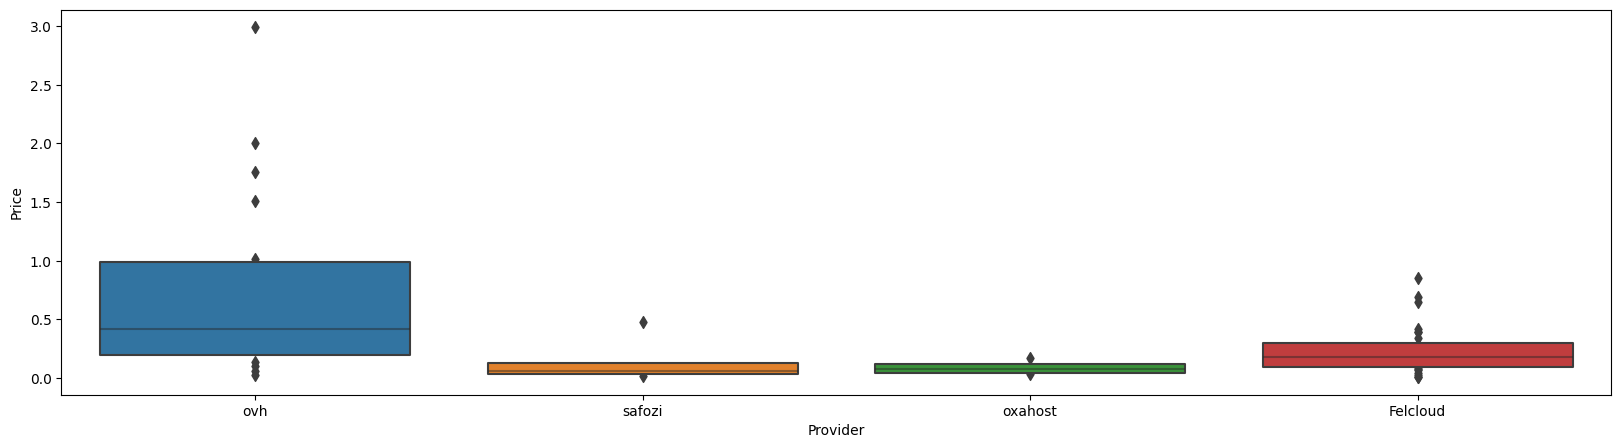

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,5))
sns.boxenplot( x="Provider" , y="Price" , data = data )


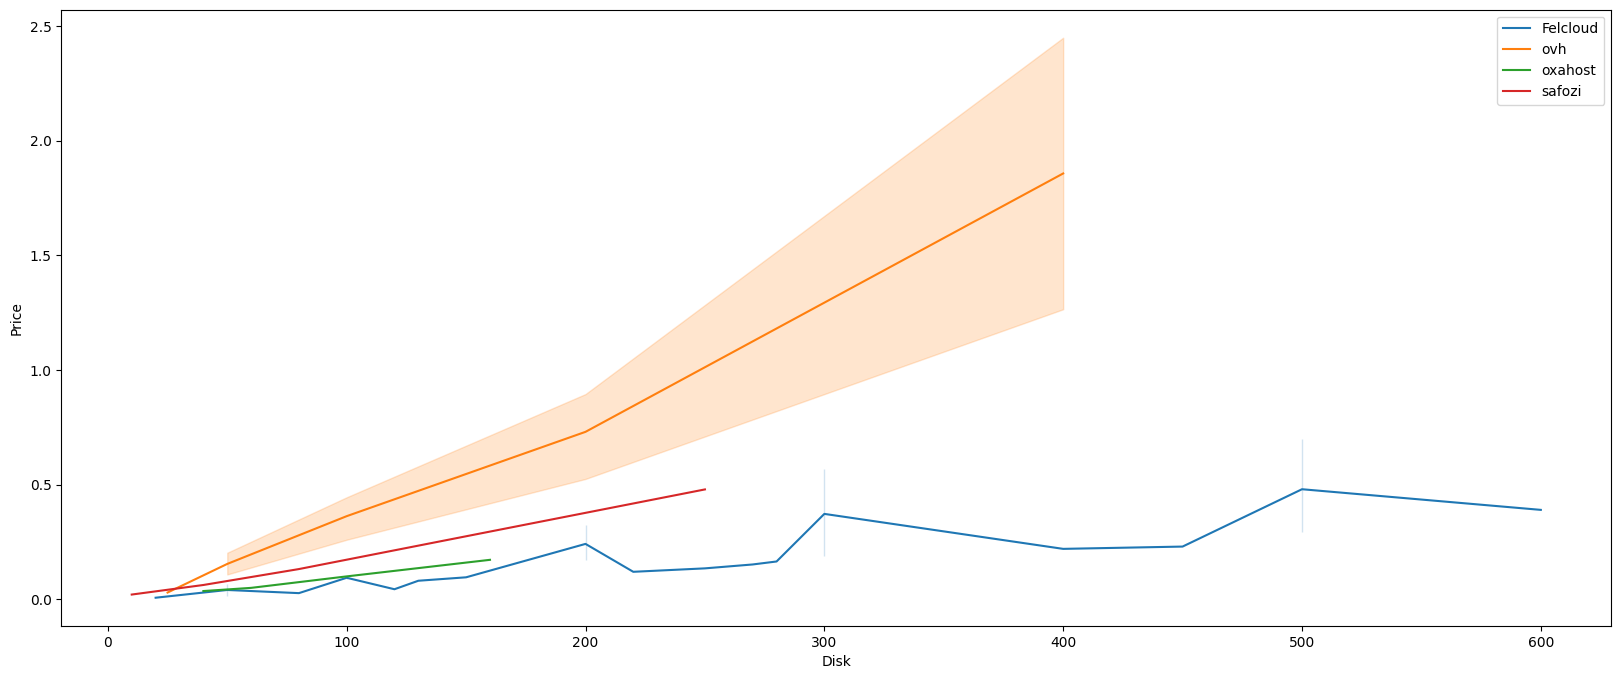

In [ ]:
plt.subplots(figsize=(20,8))
x= 'Disk'
y = 'Price'
df_filter = True
# for df in data[['Provider', 'Ram', 'Vcpu' ,'Disk']].groupby(['Provider', 'Ram', 'Vcpu' ,'Disk']):
for df in data[['Provider',  x, y]].groupby('Provider'):
    sns.lineplot(x=x, y=y  , data = df[1] , label = df[0])

Text(0.5, 1.0, 'Price')

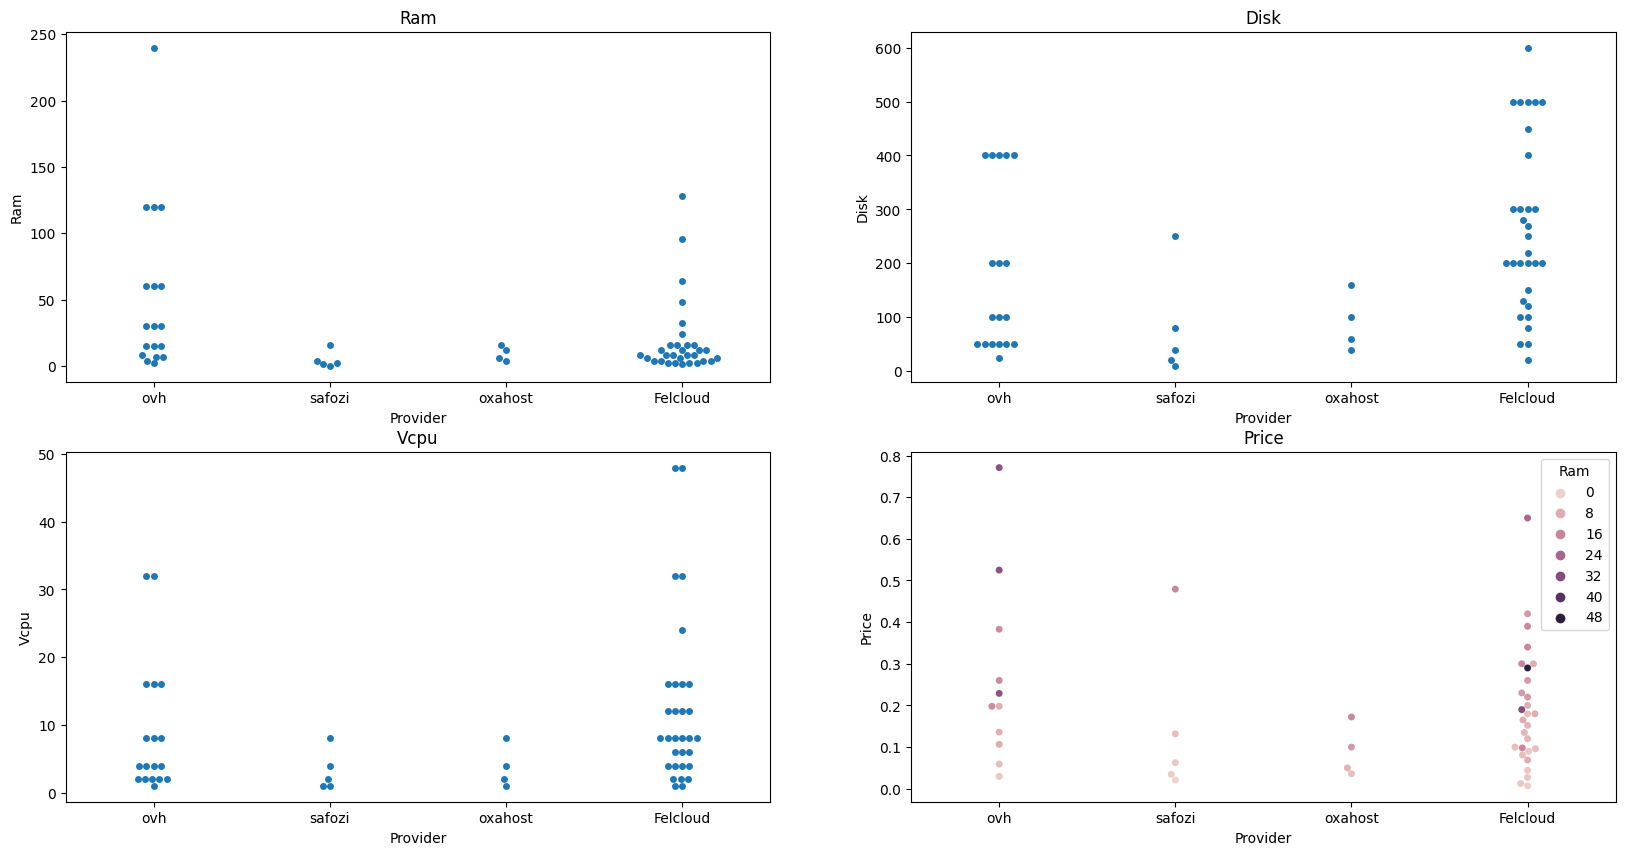

In [ ]:
fig , axes = plt.subplots(2,2,figsize=(20,10))
sns.swarmplot( ax = axes[0,0] , x='Provider' , y='Ram' , data = data )
axes[0,0].set_title("Ram")
sns.swarmplot( ax = axes[1,0] , x='Provider' , y='Vcpu' , data = data )
axes[1,0].set_title("Vcpu")
sns.swarmplot( ax = axes[0,1] , x='Provider' , y='Disk' , data = data )
axes[0,1].set_title("Disk")
sns.swarmplot( ax = axes[1,1] , x='Provider' , y='Price' , data = data[data['Ram'] <50] , hue= 'Ram' )
axes[1,1].set_title("Price")

<Axes: xlabel='Provider', ylabel='Price'>

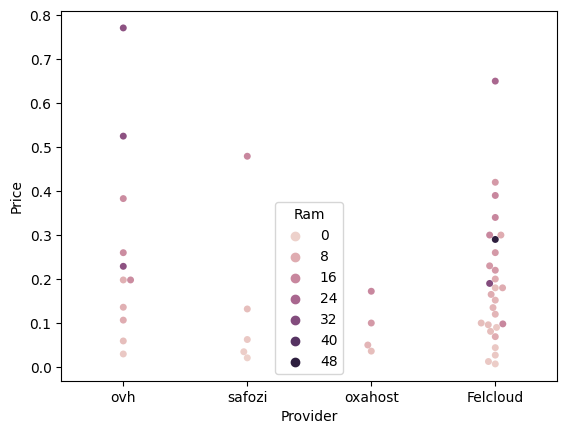

In [ ]:
sns.swarmplot( x='Provider' , y='Price' , data = data[data['Ram'] <50] , hue= 'Ram' )

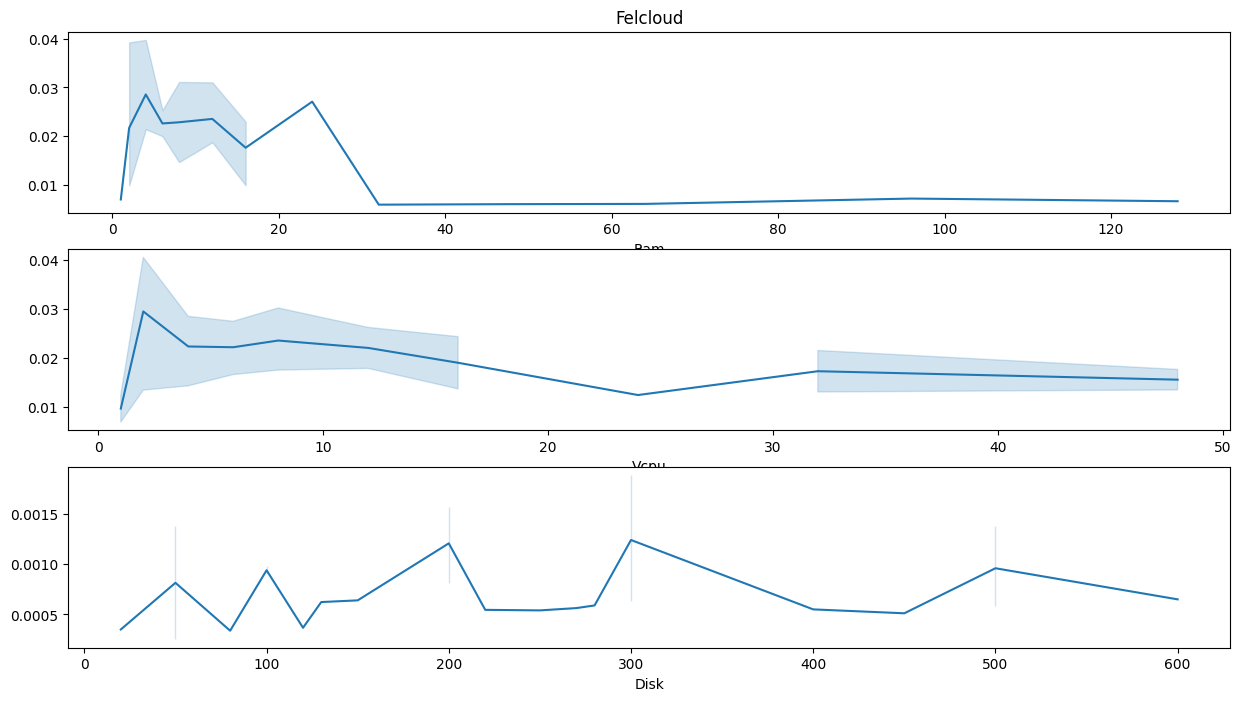

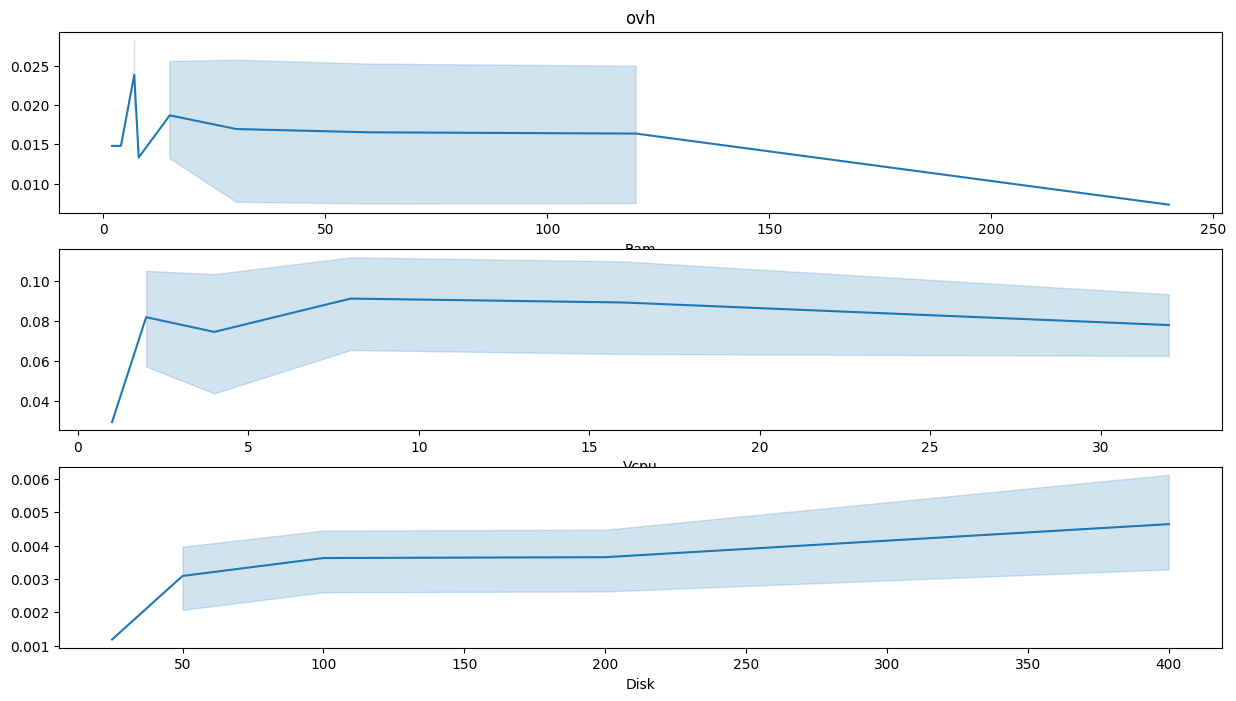

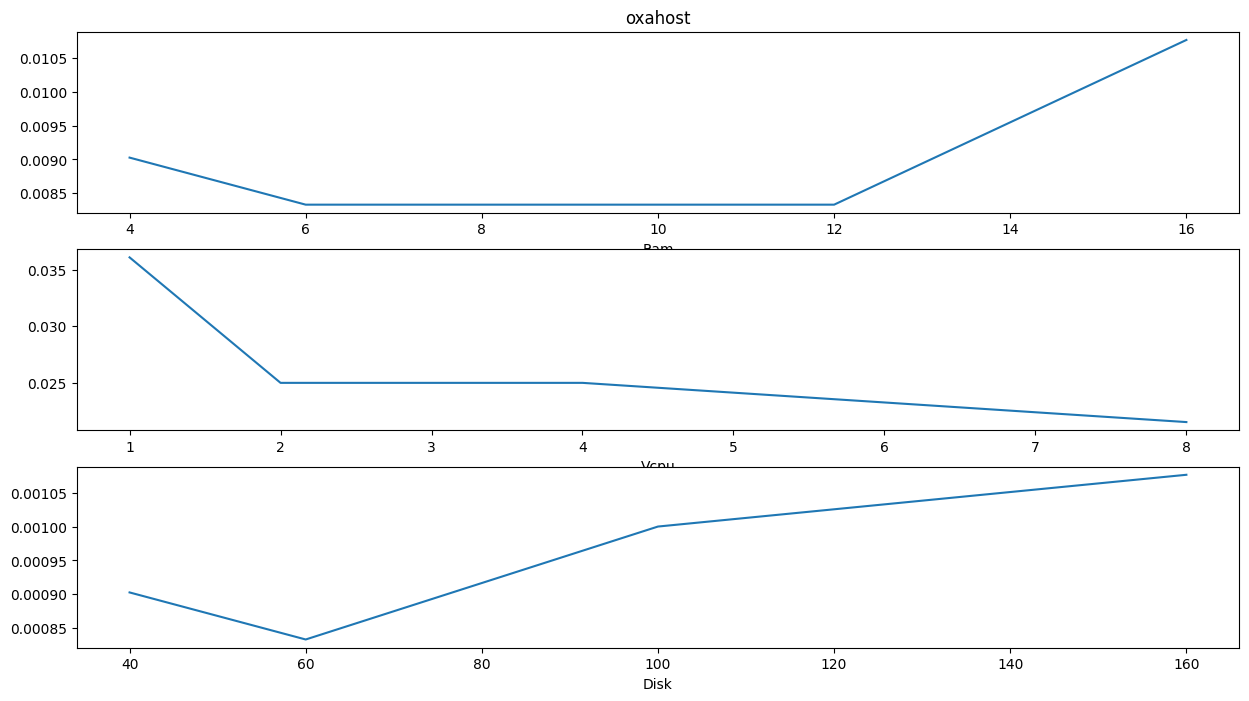

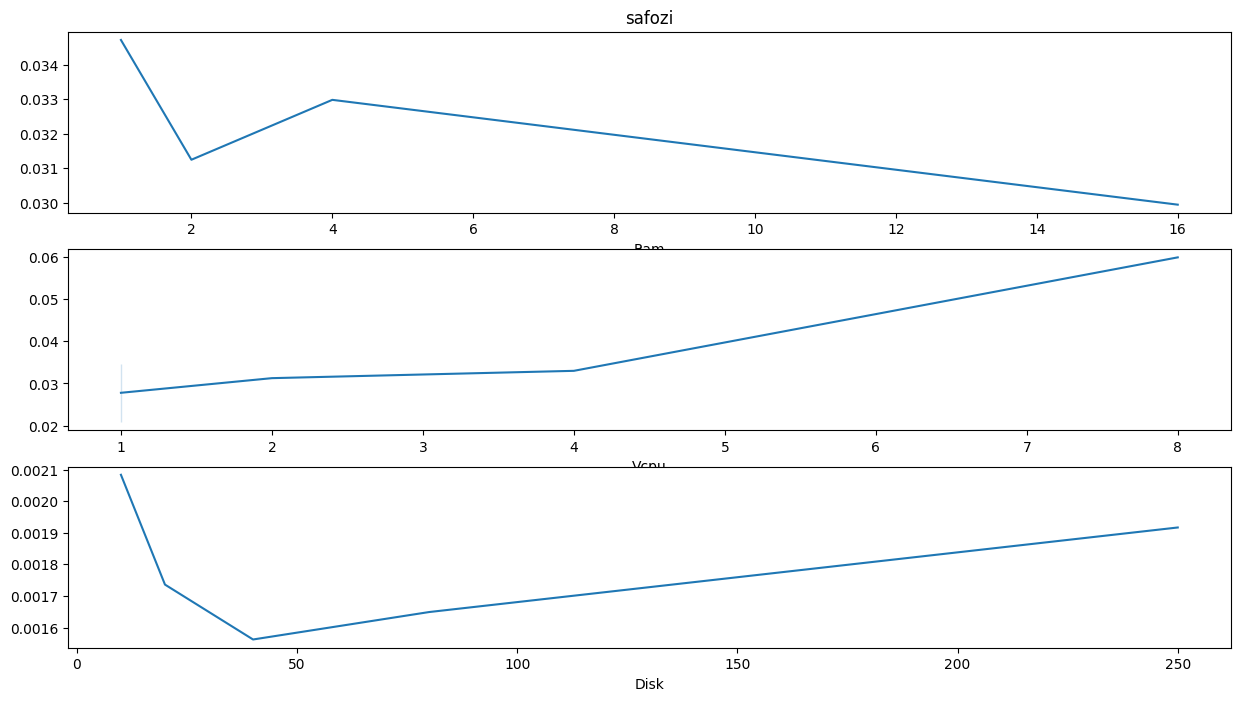

In [ ]:
for df in  data.groupby('Provider'):
    fig , ax = plt.subplots(3, figsize=(15,8))
    ax[0].set_title(df[0])
    sns.lineplot(x='Ram' ,  y=df[1]['Price']/df[1]['Ram'] , data=df[1], ax = ax[0])
    sns.lineplot(x='Vcpu' , y=df[1]['Price']/df[1]['Vcpu'] , data=df[1], ax = ax[1])
    sns.lineplot(x='Disk' , y=df[1]['Price']/df[1]['Disk'] , data=df[1], ax = ax[2])
    plt.show()

In [ ]:
# data[['Provider', 'Ram', 'Vcpu' ,'Disk']].sort_values(['Ram', 'Vcpu' ,'Disk'] ,  ascending = False).value_counts(['Provider', 'Ram', 'Vcpu' ,'Disk']).sort_values(ascending=False).to_csv("provider_classfied.csv")
data[['Provider', 'Ram', 'Vcpu' ,'Disk']].sort_values(['Ram', 'Vcpu' ,'Disk'] ,  ascending = False).groupby(['Provider', 'Ram', 'Vcpu' ,'Disk']).count().sort_values( ['Provider', 'Ram', 'Vcpu' ,'Disk'], ascending=False)#.to_csv("provider_classfied.csv")

Empty DataFrame
Columns: []
Index: [(safozi, 16, 8, 250), (safozi, 4, 4, 80), (safozi, 2, 2, 40), (safozi, 1, 1, 20), (safozi, 0, 1, 10), (oxahost, 16, 8, 160), (oxahost, 12, 4, 100), (oxahost, 6, 2, 60), (oxahost, 4, 1, 40), (ovh, 240, 16, 400), (ovh, 120, 32, 400), (ovh, 120, 8, 200), (ovh, 60, 16, 400), (ovh, 60, 4, 100), (ovh, 30, 8, 200), (ovh, 30, 2, 50), (ovh, 15, 4, 100), (ovh, 15, 2, 50), (ovh, 8, 4, 50), (ovh, 7, 2, 50), (ovh, 4, 2, 50), (ovh, 2, 1, 25), (Felcloud, 128, 48, 500), (Felcloud, 96, 32, 300), (Felcloud, 64, 16, 200), (Felcloud, 48, 12, 200), (Felcloud, 32, 8, 200), (Felcloud, 24, 48, 500), (Felcloud, 16, 16, 600), (Felcloud, 16, 12, 500), (Felcloud, 16, 8, 500), (Felcloud, 16, 4, 100), (Felcloud, 12, 32, 300), (Felcloud, 12, 16, 500), (Felcloud, 12, 12, 450), (Felcloud, 12, 8, 400), (Felcloud, 8, 24, 200), (Felcloud, 8, 12, 300), (Felcloud, 8, 8, 300), (Felcloud, 8, 6, 280), (Felcloud, 8, 2, 50), (Felcloud, 6, 8, 270), (Felcloud, 6, 6, 250), (Felcloud, 6, 4, 220), (Felcloud, 4, 16, 200), (Felcloud, 4, 6, 200), (Felcloud, 4, 4, 150), (Felcloud, 4, 2, 130), (Felcloud, 2, 8, 100), (Felcloud, 2, 4, 120), (Felcloud, 2, 2, 80), (Felcloud, 2, 1, 50), (Felcloud, 1, 1, 20)]

In [ ]:
data_by_provider = data[['Provider', 'Ram', 'Vcpu' ,'Disk']].sort_values(['Ram', 'Vcpu' ,'Disk'] ,  ascending = False).groupby(['Provider', 'Ram', 'Vcpu' ,'Disk']).count().sort_values( ['Provider', 'Ram', 'Vcpu' ,'Disk'], ascending=False)

In [ ]:
data_by_provider

Empty DataFrame
Columns: []
Index: [(safozi, 16, 8, 250), (safozi, 4, 4, 80), (safozi, 2, 2, 40), (safozi, 1, 1, 20), (safozi, 0, 1, 10), (oxahost, 16, 8, 160), (oxahost, 12, 4, 100), (oxahost, 6, 2, 60), (oxahost, 4, 1, 40), (ovh, 240, 16, 400), (ovh, 120, 32, 400), (ovh, 120, 8, 200), (ovh, 60, 16, 400), (ovh, 60, 4, 100), (ovh, 30, 8, 200), (ovh, 30, 2, 50), (ovh, 15, 4, 100), (ovh, 15, 2, 50), (ovh, 8, 4, 50), (ovh, 7, 2, 50), (ovh, 4, 2, 50), (ovh, 2, 1, 25), (Felcloud, 128, 48, 500), (Felcloud, 96, 32, 300), (Felcloud, 64, 16, 200), (Felcloud, 48, 12, 200), (Felcloud, 32, 8, 200), (Felcloud, 24, 48, 500), (Felcloud, 16, 16, 600), (Felcloud, 16, 12, 500), (Felcloud, 16, 8, 500), (Felcloud, 16, 4, 100), (Felcloud, 12, 32, 300), (Felcloud, 12, 16, 500), (Felcloud, 12, 12, 450), (Felcloud, 12, 8, 400), (Felcloud, 8, 24, 200), (Felcloud, 8, 12, 300), (Felcloud, 8, 8, 300), (Felcloud, 8, 6, 280), (Felcloud, 8, 2, 50), (Felcloud, 6, 8, 270), (Felcloud, 6, 6, 250), (Felcloud, 6, 4, 220), (Felcloud, 4, 16, 200), (Felcloud, 4, 6, 200), (Felcloud, 4, 4, 150), (Felcloud, 4, 2, 130), (Felcloud, 2, 8, 100), (Felcloud, 2, 4, 120), (Felcloud, 2, 2, 80), (Felcloud, 2, 1, 50), (Felcloud, 1, 1, 20)]

/tmp/ipykernel_8053/3447772575.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot("month", "year", "passengers")


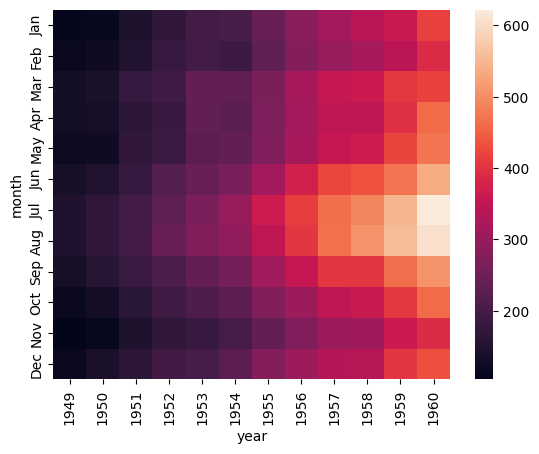

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

In [ ]:
# data[['Provider', 'Price' , 'Ram']].pivot("Provider" , "Price")
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
data.head()


,Flavor,Vcpu,Ram,Disk,Price,Provider
0,b2-7,2,7,50,0.1359,ovh
1,b2-15,4,15,100,0.2599,ovh
2,b2-30,8,30,200,0.5249,ovh
3,b2-60,16,60,400,1.0179,ovh
4,b2-120,32,120,400,2.0049,ovh


<Axes: xlabel='Provider', ylabel='Price'>

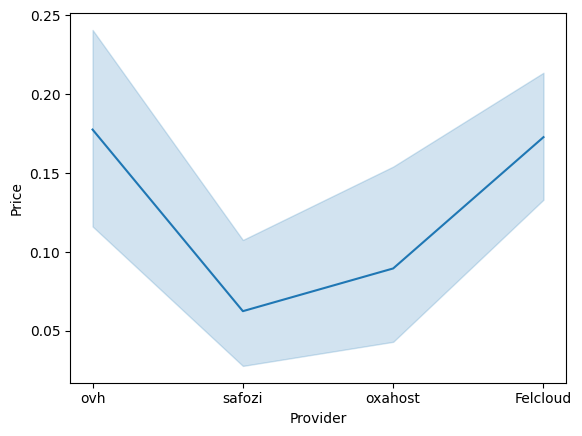

In [ ]:
sns.lineplot(x='Provider' , y='Price'  , data = data[data.Price < 0.4] )

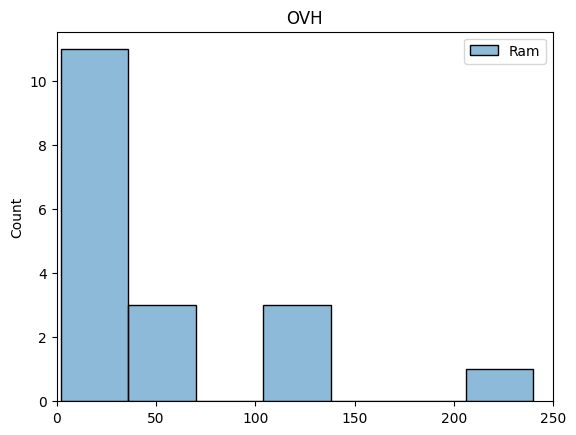

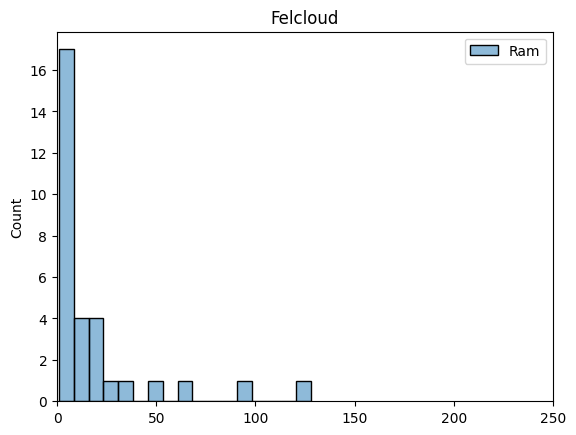

In [ ]:
sns.histplot(data = data[data['Provider'].isin(['ovh'])][[ 'Ram']])
plt.title("OVH")
plt.xlim([0,250])
plt.show()
sns.histplot(data = data[data['Provider'].isin(['Felcloud'])][[ 'Ram']])
plt.title("Felcloud")
plt.xlim([0,250])
plt.show()


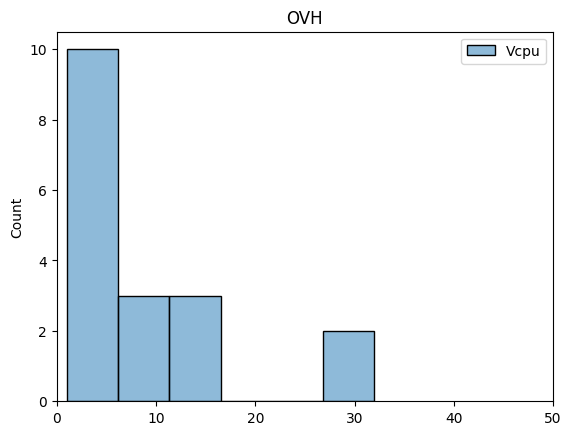

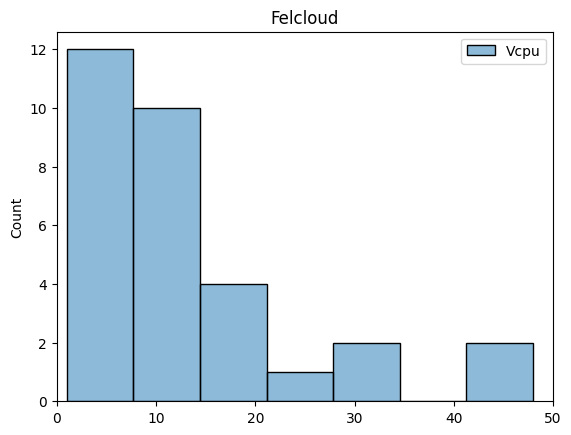

In [ ]:
sns.histplot(data = data[data['Provider'].isin(['ovh'])][[ 'Vcpu']])
plt.title("OVH")
plt.xlim([0,50])
plt.show()
sns.histplot(data = data[data['Provider'].isin(['Felcloud'])][[ 'Vcpu']])
plt.title("Felcloud")
plt.xlim([0,50])
plt.show()

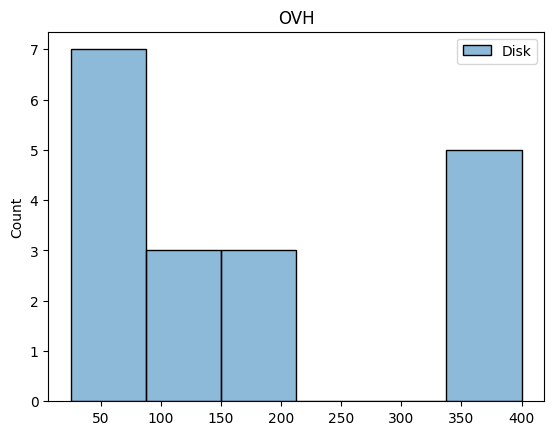

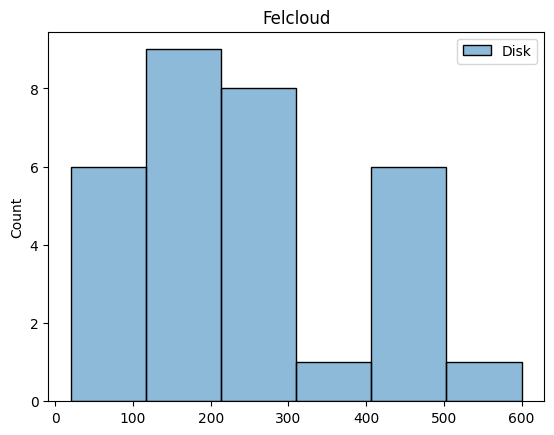

In [ ]:
sns.histplot(data = data[data['Provider'].isin(['ovh'])][[ 'Disk']])
plt.title("OVH")
plt.show()
sns.histplot(data = data[data['Provider'].isin(['Felcloud'])][[ 'Disk']])
plt.title("Felcloud")
plt.show()

<Axes: xlabel='Ram', ylabel='Price'>

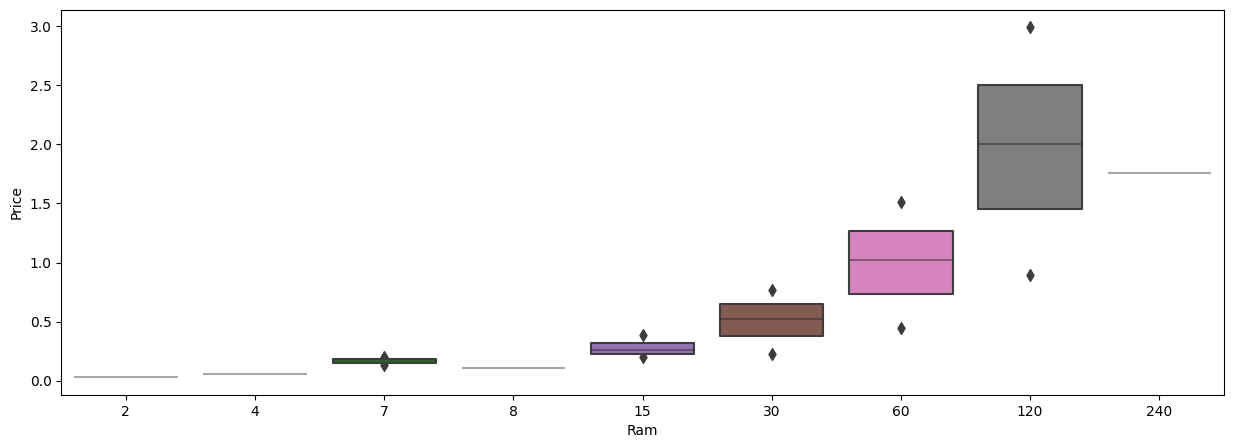

In [ ]:
plt.subplots(figsize=(15,5))
sns.boxenplot(data = data[data['Provider'].isin(['ovh'])][['Vcpu', 'Ram', 'Disk', 'Price', 'Provider']], x='Ram', y='Price' )


<Axes: xlabel='Vcpu', ylabel='Price'>

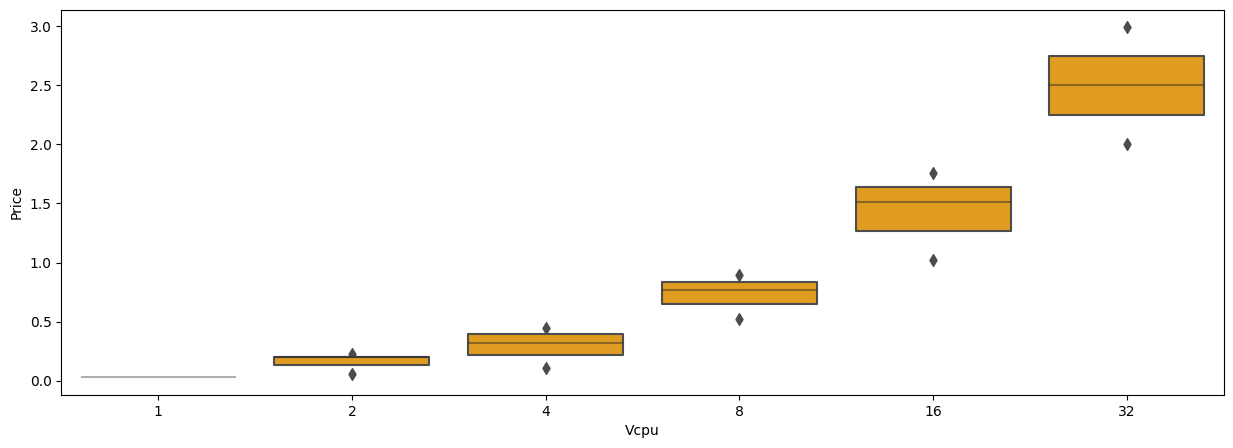

In [ ]:
plt.subplots(figsize=(15,5))
sns.boxenplot(data = data[data['Provider'].isin(['ovh'])][['Vcpu', 'Ram', 'Disk', 'Price', 'Provider']], x='Vcpu', y='Price', color="orange" )

<Axes: xlabel='Ram', ylabel='Price'>

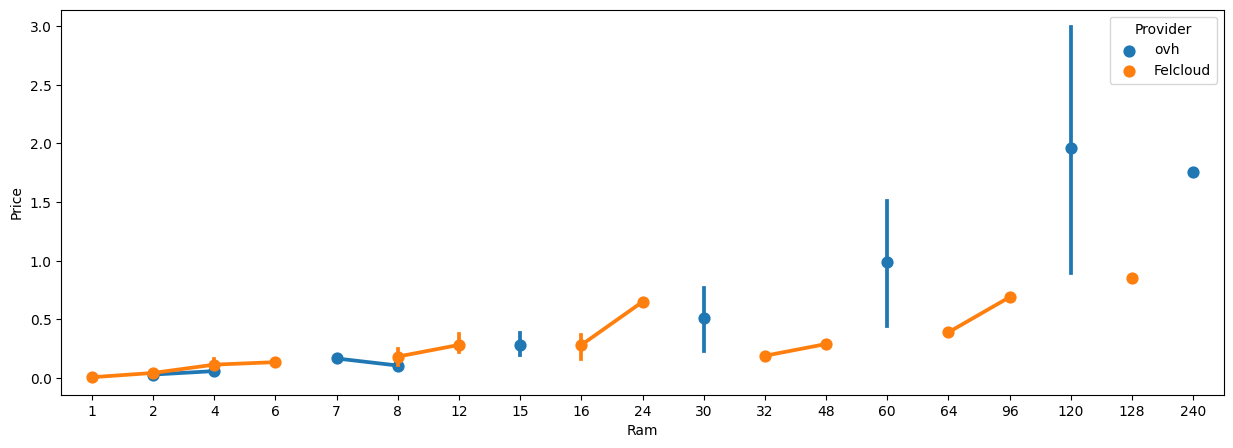

In [ ]:
plt.subplots(figsize=(15,5))
sns.pointplot(data = data[data['Provider'].isin(['Felcloud' , 'ovh'])][['Vcpu', 'Ram', 'Disk', 'Price', 'Provider']], x='Ram', y='Price' , hue='Provider' )

<Axes: xlabel='Vcpu', ylabel='Price'>

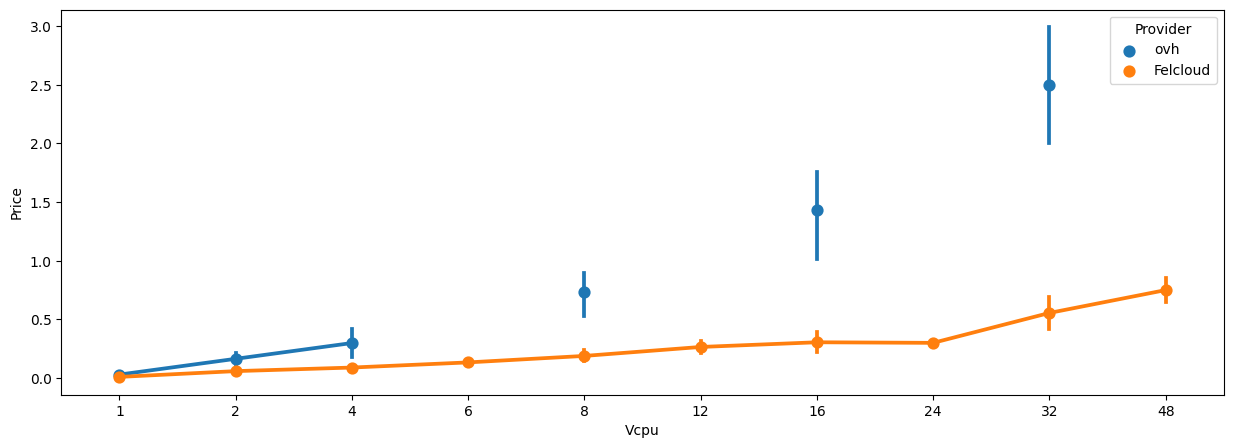

In [ ]:
plt.subplots(figsize=(15,5))
sns.pointplot(data = data[data['Provider'].isin(['Felcloud' , 'ovh'])][['Vcpu', 'Ram', 'Disk', 'Price', 'Provider']], x='Vcpu', y='Price' , hue='Provider' )

In [ ]:
data.columns

Index(['Flavor', 'Vcpu', 'Ram', 'Disk', 'Price', 'Provider'], dtype='object')

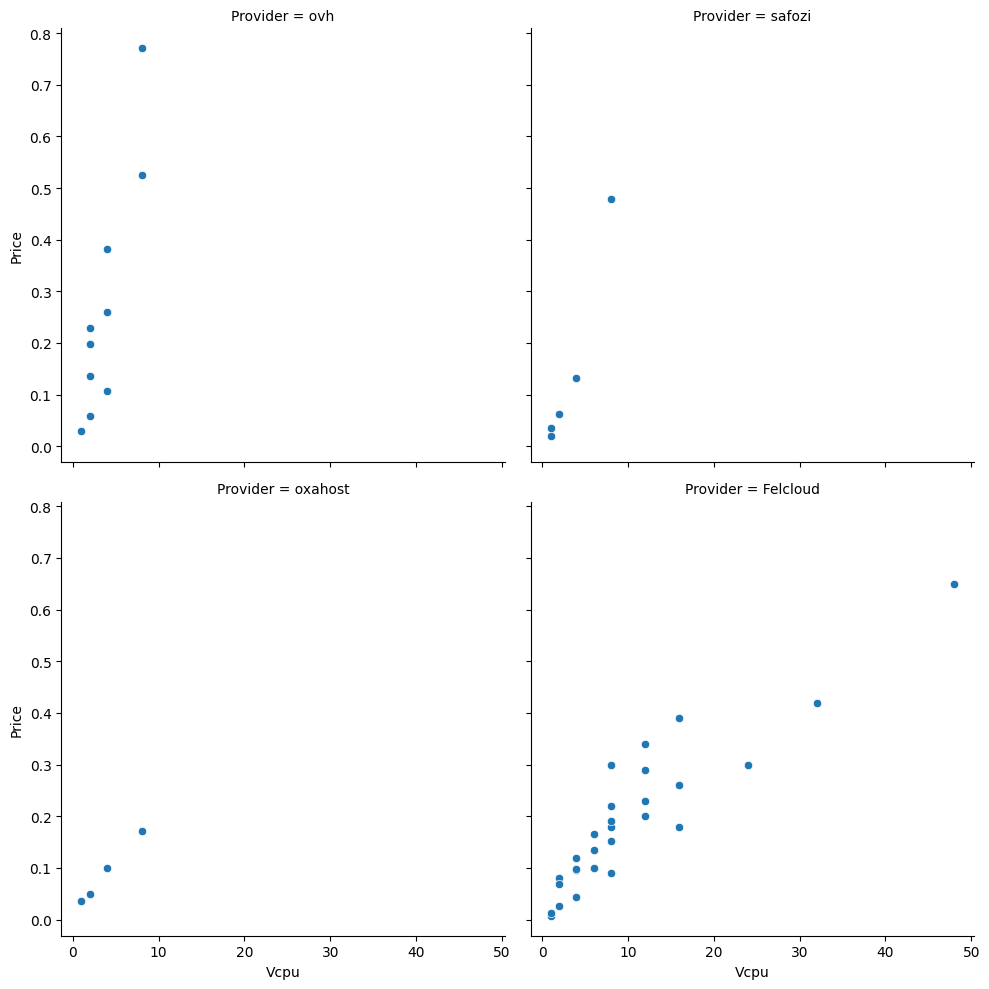

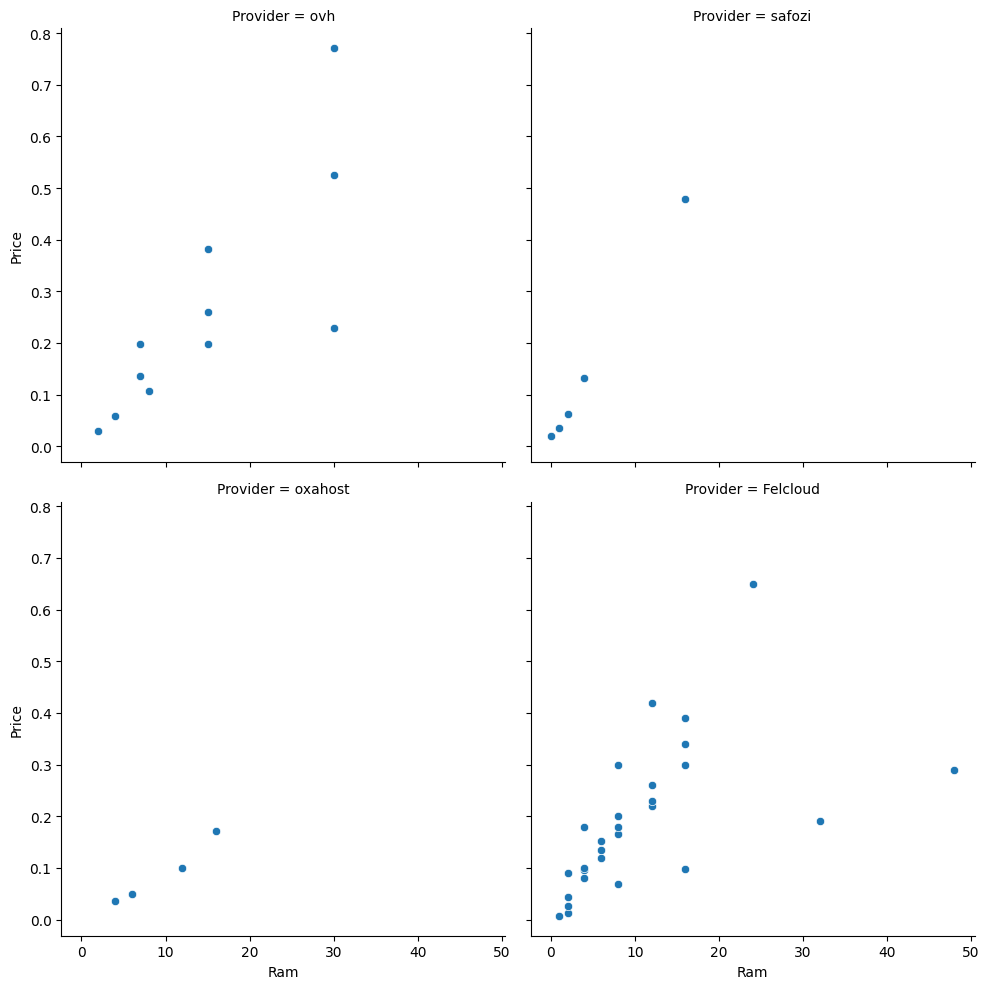

In [ ]:
sns.relplot(x=data[data['Ram'] < 50]['Vcpu'], y= data[data['Ram'] < 50]['Price'],  col=data[data['Ram'] < 50]["Provider"], col_wrap=2)
sns.relplot(x=data[data['Ram'] < 50]['Ram'], y= data[data['Ram'] < 50]['Price'],  col=data[data['Ram'] < 50]["Provider"], col_wrap=2)

<Axes: xlabel='Ram', ylabel='Price'>

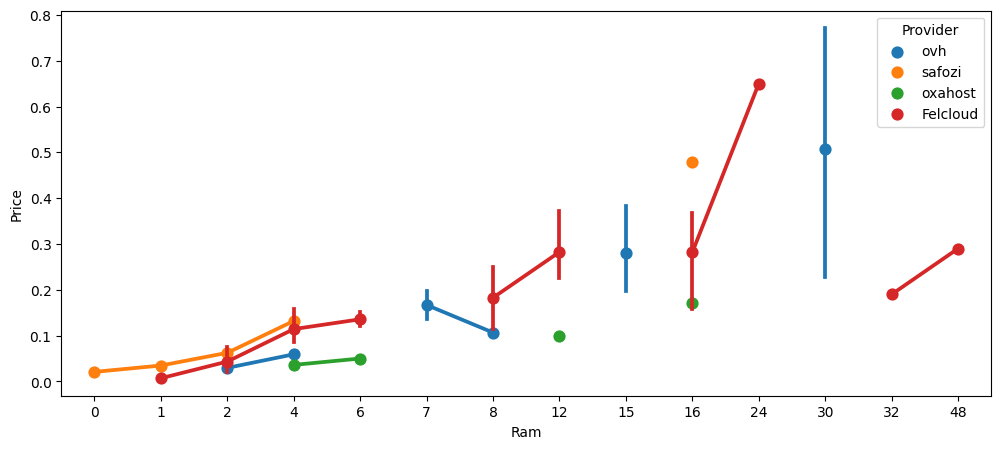

In [ ]:
# sns.scatterplot(x=data['Vcpu'], y= data['Price'],  hue=data["Provider"])
plt.subplots(figsize=(12,5))
sns.pointplot(x=data[data['Ram'] < 50]['Ram'], y= data[data['Ram'] < 50]['Price'],  hue=data[data['Ram'] < 50]["Provider"])
# sns.scatterplot(x=data['Disk'], y= data['Price'],  hue=data["Provider"])

In [ ]:
# define the bin ranges for each column
vcpu_bins = [0, 4, 8, 16, 32, float('inf')]
ram_bins = [0, 2, 4, 8, 16, 32, 64, 128, float('inf')]
disk_bins = [0, 50, 100, 200, 400, 1600, float('inf')]

# create new columns with the binned values
data['Vcpu_bin'] = pd.cut(data['Vcpu'], bins=vcpu_bins)
data['Ram_bin'] = pd.cut(data['Ram'], bins=ram_bins)
data['Disk_bin'] = pd.cut(data['Disk'], bins=disk_bins)

# group the data by Provider and the new bins, and calculate the mean price for each group
data.groupby(['Provider', 'Vcpu_bin', 'Ram_bin', 'Disk_bin'])['Price'].mean()

Provider  Vcpu_bin     Ram_bin       Disk_bin       
Felcloud  (0.0, 4.0]   (0.0, 2.0]    (0.0, 50.0]        0.00975
                                     (50.0, 100.0]      0.02700
                                     (100.0, 200.0]     0.04400
                                     (200.0, 400.0]         NaN
                                     (400.0, 1600.0]        NaN
                                                         ...   
safozi    (32.0, inf]  (128.0, inf]  (50.0, 100.0]          NaN
                                     (100.0, 200.0]         NaN
                                     (200.0, 400.0]         NaN
                                     (400.0, 1600.0]        NaN
                                     (1600.0, inf]          NaN
Name: Price, Length: 960, dtype: float64

In [ ]:
# [8 in interval for interval in data['Vcpu_bin'].unique() ]
data['Vcpu_bin'].unique().size

5

In [ ]:
df_plot = pd.DataFrame(data.groupby(['Provider', 'Vcpu_bin', 'Ram_bin', 'Disk_bin'])['Price'].mean())#.to_csv("bin_comparaison.csv")
df_plot.reset_index().groupby(['Ram_bin','Vcpu_bin', 'Provider']).mean().to_csv("bin_comparaison.csv")

/tmp/ipykernel_8053/3715241007.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_plot.reset_index().groupby(['Ram_bin','Vcpu_bin', 'Provider']).mean().to_csv("bin_comparaison.csv")


/tmp/ipykernel_8053/166315859.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_plot = df_plot.reset_index().groupby(['Ram_bin','Vcpu_bin', 'Provider']).mean().reset_index()


<Axes: xlabel='Ram_bin', ylabel='Price'>

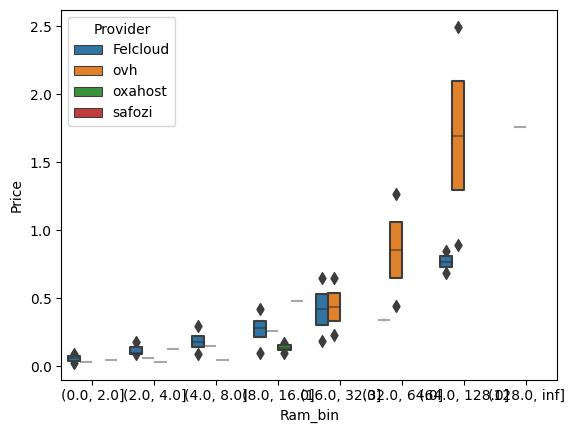

In [ ]:
df_plot = df_plot.reset_index().groupby(['Ram_bin','Vcpu_bin', 'Provider']).mean().reset_index()
sns.boxenplot(data= df_plot, x='Ram_bin', y='Price', hue='Provider')

In [ ]:
df_plot = data.groupby(['Provider', 'Vcpu_bin', 'Ram_bin', 'Disk_bin'])['Price'].mean().reset_index().dropna()
# sns.scatterplot(x=df_plot['Vcpu_bin'] ,y=df_plot['Price'] , data = df_plot[['Provider', 'Vcpu_bin', 'Price']], hue="Provider")
df_plot

,Provider,Vcpu_bin,Ram_bin,Disk_bin,Price
0,Felcloud,"(0.0, 4.0]","(0.0, 2.0]","(0.0, 50.0]",0.009750
1,Felcloud,"(0.0, 4.0]","(0.0, 2.0]","(50.0, 100.0]",0.027000
2,Felcloud,"(0.0, 4.0]","(0.0, 2.0]","(100.0, 200.0]",0.044000
8,Felcloud,"(0.0, 4.0]","(2.0, 4.0]","(100.0, 200.0]",0.088500
12,Felcloud,"(0.0, 4.0]","(4.0, 8.0]","(0.0, 50.0]",0.069000
15,Felcloud,"(0.0, 4.0]","(4.0, 8.0]","(200.0, 400.0]",0.120000
19,Felcloud,"(0.0, 4.0]","(8.0, 16.0]","(50.0, 100.0]",0.098000
49,Felcloud,"(4.0, 8.0]","(0.0, 2.0]","(50.0, 100.0]",0.090000
56,Felcloud,"(4.0, 8.0]","(2.0, 4.0]","(100.0, 200.0]",0.100000
63,Felcloud,"(4.0, 8.0]","(4.0, 8.0]","(200.0, 400.0]",0.158000


In [ ]:
# pd.DataFrame(data.groupby(['Interval','Provider'])['Price'].mean()).reset_index().value_counts('Interval')

<Axes: xlabel='Vcpu_bin', ylabel='Price'>

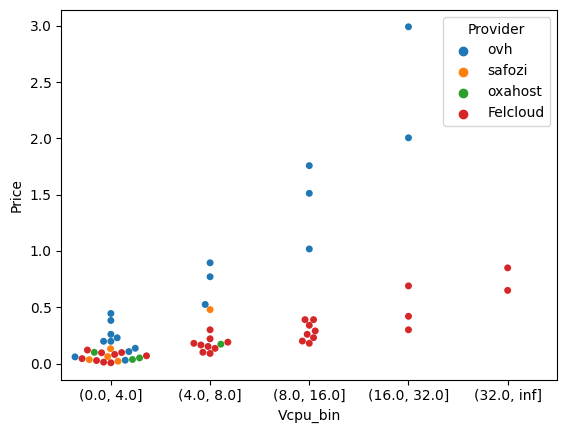

In [ ]:
sns.swarmplot(data = data, x='Vcpu_bin', y='Price', hue='Provider')

<Axes: xlabel='Ram_bin', ylabel='Price'>

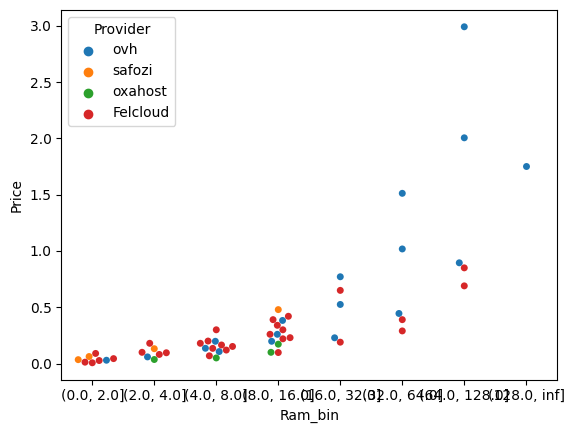

In [ ]:
sns.swarmplot(data = data, x='Ram_bin', y='Price', hue='Provider')

<Axes: xlabel='Disk_bin', ylabel='Price'>

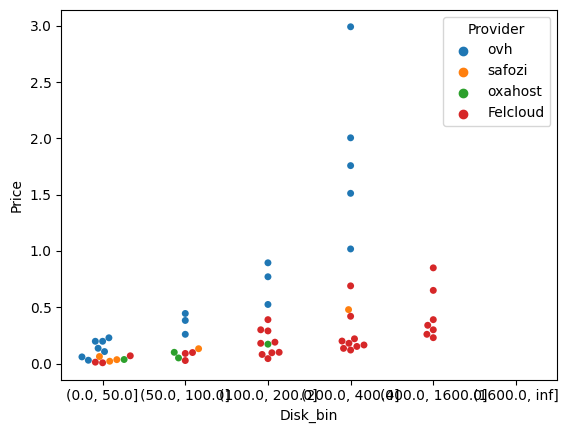

In [ ]:
sns.swarmplot(data = data, x='Disk_bin', y='Price', hue='Provider')

In [ ]:
df_data = data.groupby(['Ram_bin', 'Vcpu_bin' , 'Provider' ])['Price'].agg(["mean", "median" , "std" , "max", "min"]).reset_index()


In [ ]:
data[ 'Class_Provider'] , _ = data[ 'Provider'].factorize()

In [ ]:
summary_table = pd.pivot_table(data, values='Price', index=['Provider'], columns=['Vcpu', 'Ram', 'Disk'], aggfunc='mean')
# sns.heatmap(data = data[[ 'Class_Provider' ,'Price']] , x="Class_Provider" , y="Price")

In [ ]:
data.columns

Index(['Flavor', 'Vcpu', 'Ram', 'Disk', 'Price', 'Provider', 'Vcpu_bin',
       'Ram_bin', 'Disk_bin', 'Class_Provider'],
      dtype='object')

In [ ]:
# summary_table.to_csv("data_pivot_table.csv")
# data[['Flavor', 'Vcpu', 'Ram', 'Disk', 'Price', 'Provider']].to_csv("cleaned_data.csv")

<Axes: xlabel='Ram', ylabel='Provider'>

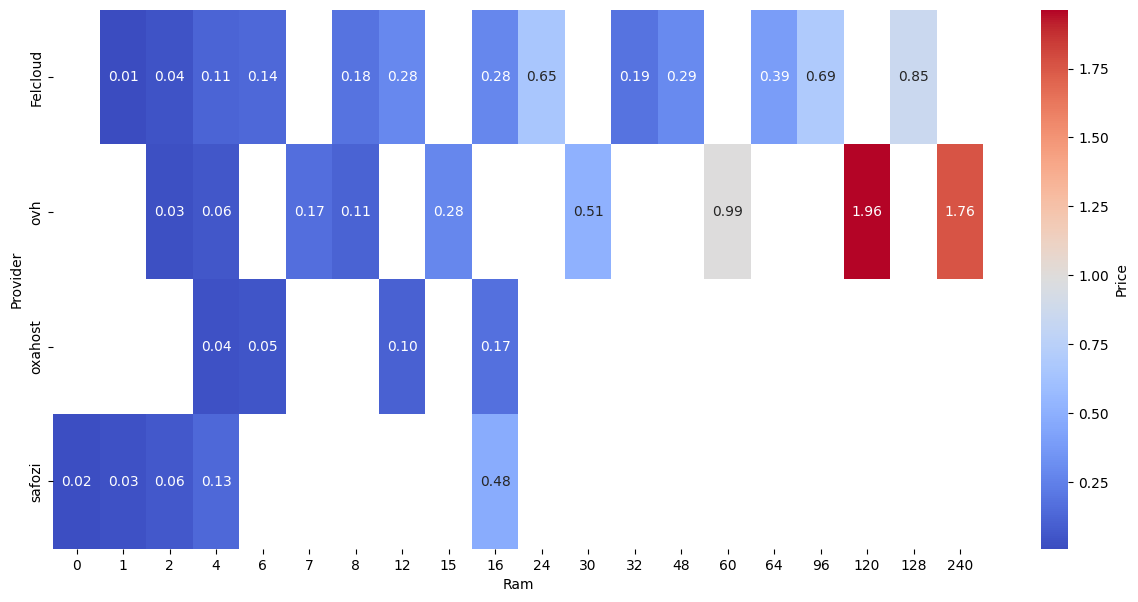

In [ ]:
summary_table = pd.pivot_table(data, values='Price', index=['Provider'], columns=[ 'Ram'], aggfunc='mean')
plt.subplots(figsize=(15,7))
sns.heatmap(summary_table, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Price'})


<Axes: xlabel='Vcpu', ylabel='Provider'>

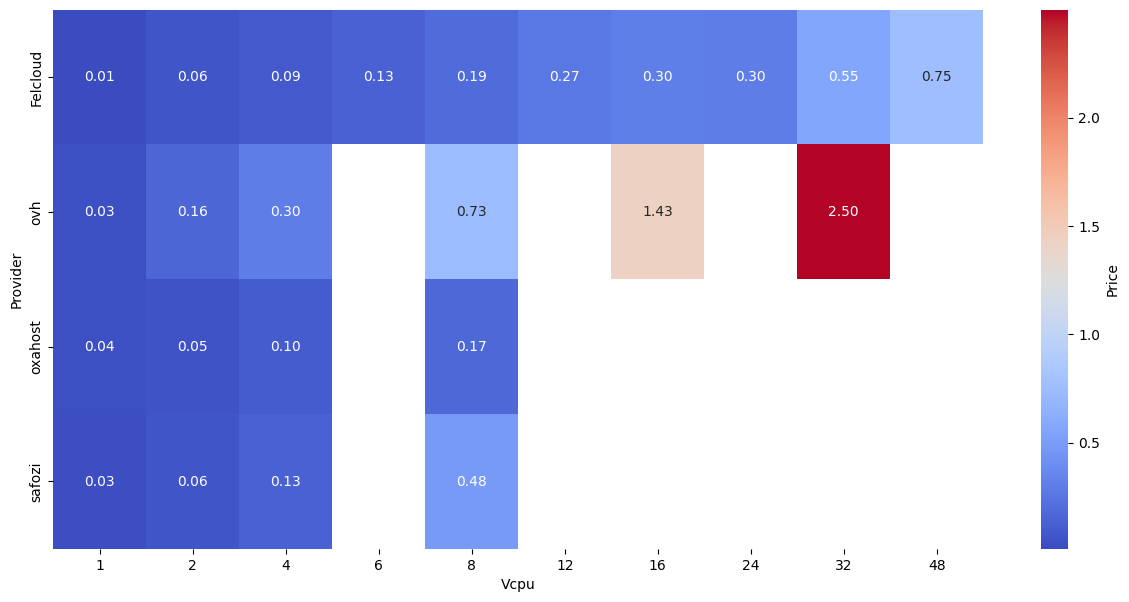

In [ ]:
summary_table = pd.pivot_table(data, values='Price', index=['Provider'], columns=[ 'Vcpu'], aggfunc='mean')
plt.subplots(figsize=(15,7))
sns.heatmap(summary_table, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Price'})


<Axes: xlabel='Disk', ylabel='Provider'>

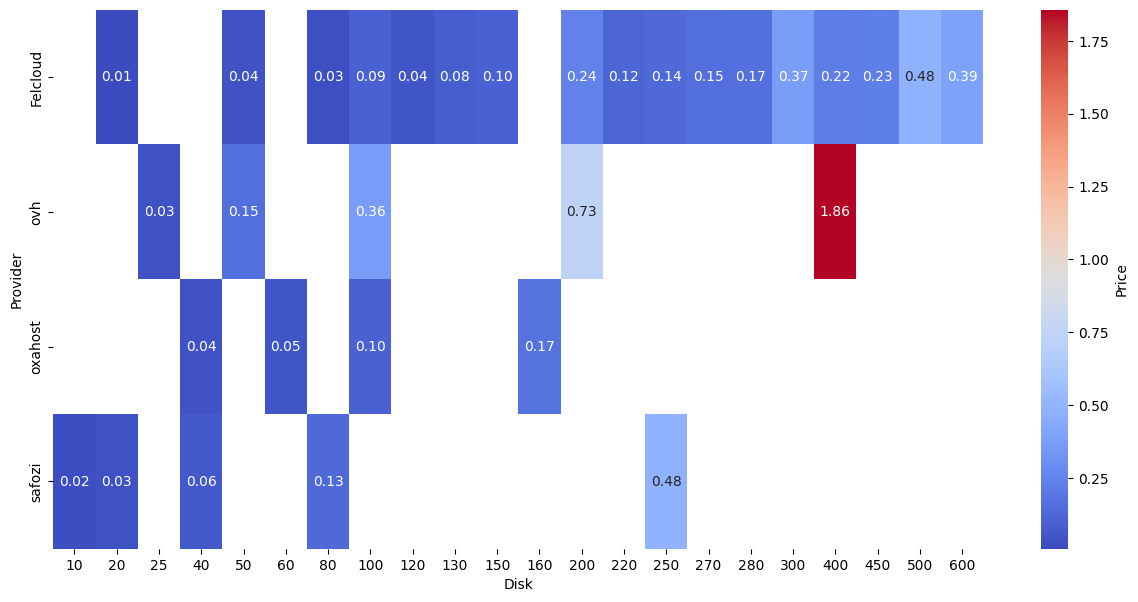

In [ ]:
summary_table = pd.pivot_table(data, values='Price', index=['Provider'], columns=[ 'Disk'], aggfunc='mean')
plt.subplots(figsize=(15,7))
sns.heatmap(summary_table, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Price'})

<Axes: xlabel='Ram_Vcpu', ylabel='Price'>

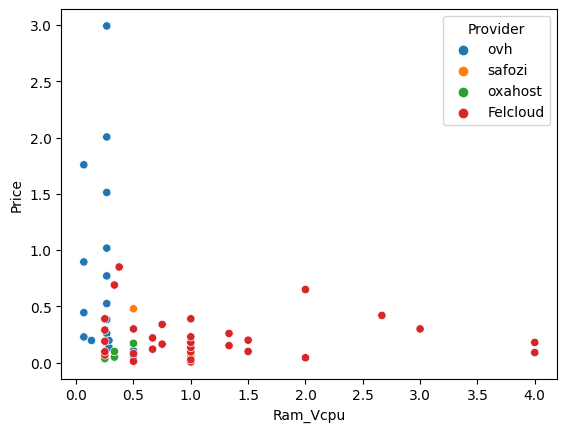

In [ ]:
# faire un ratio Ram / Vcpu
data['Ram_Vcpu'] = data['Vcpu'] / data['Ram']
sns.scatterplot(data[['Ram_Vcpu' , 'Price', 'Provider']], x='Ram_Vcpu', y='Price', hue= 'Provider')

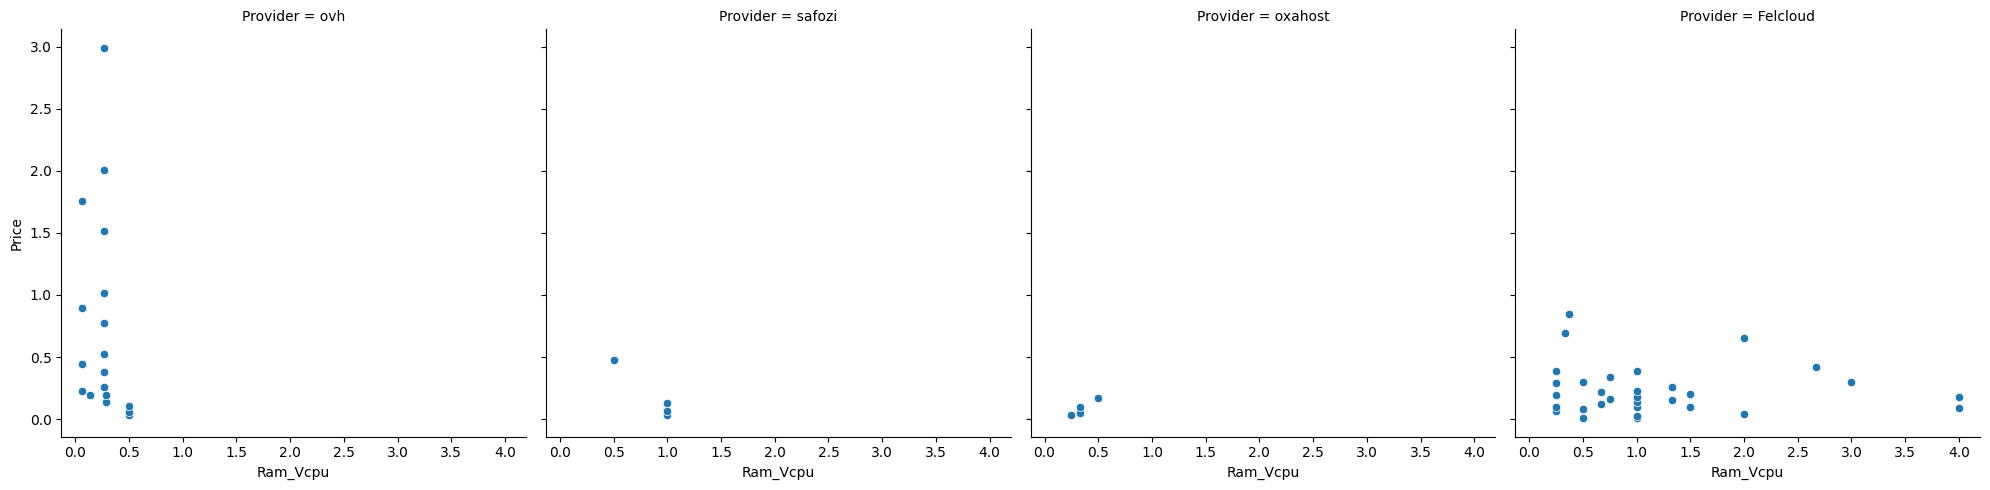

In [ ]:
sns.relplot(data[['Ram_Vcpu' , 'Price', 'Provider', 'Flavor']], x='Ram_Vcpu', y='Price', col= 'Provider')

<Axes: xlabel='Ram', ylabel='Count'>

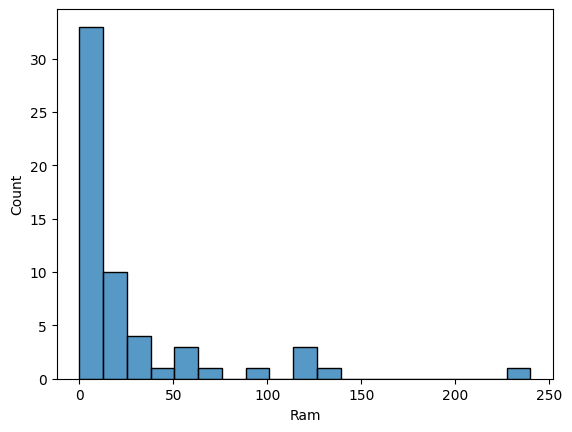

In [ ]:
# sns.displot(data['Ram_Vcpu' ])
sns.histplot(data['Ram'])

<Axes: xlabel='Vcpu', ylabel='Count'>

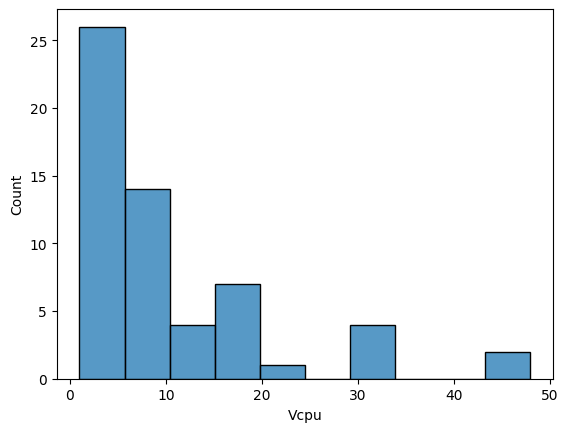

In [ ]:
sns.histplot(data['Vcpu'])

<Axes: xlabel='Ram', ylabel='Vcpu'>

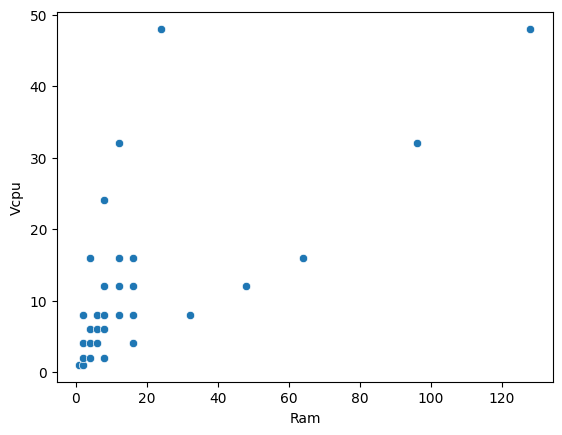

In [ ]:
sns.scatterplot(data = data[data.Provider == "Felcloud"][['Ram' , 'Vcpu','Provider']], x="Ram" , y="Vcpu" )

<Axes: xlabel='Ram', ylabel='Vcpu'>

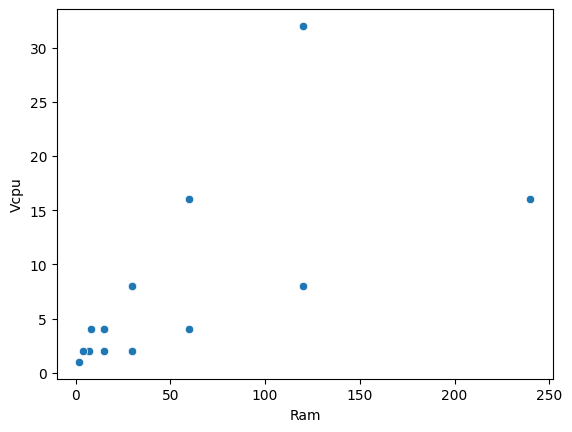

In [ ]:
sns.scatterplot(data = data[data.Provider == "ovh"][['Ram' , 'Vcpu','Provider']], x="Ram" , y="Vcpu" )

In [ ]:
data

,Flavor,Vcpu,Ram,Disk,Price,Provider,Vcpu_bin,Ram_bin,Disk_bin,Class_Provider,Ram_Vcpu
0,b2-7,2,7,50,0.135900,ovh,"(0.0, 4.0]","(4.0, 8.0]","(0.0, 50.0]",0,0.285714
1,b2-15,4,15,100,0.259900,ovh,"(0.0, 4.0]","(8.0, 16.0]","(50.0, 100.0]",0,0.266667
2,b2-30,8,30,200,0.524900,ovh,"(4.0, 8.0]","(16.0, 32.0]","(100.0, 200.0]",0,0.266667
3,b2-60,16,60,400,1.017900,ovh,"(8.0, 16.0]","(32.0, 64.0]","(200.0, 400.0]",0,0.266667
4,b2-120,32,120,400,2.004900,ovh,"(16.0, 32.0]","(64.0, 128.0]","(200.0, 400.0]",0,0.266667
5,c2-7,2,7,50,0.197900,ovh,"(0.0, 4.0]","(4.0, 8.0]","(0.0, 50.0]",0,0.285714
6,c2-15,4,15,100,0.382900,ovh,"(0.0, 4.0]","(8.0, 16.0]","(50.0, 100.0]",0,0.266667
7,c2-30,8,30,200,0.770900,ovh,"(4.0, 8.0]","(16.0, 32.0]","(100.0, 200.0]",0,0.266667
8,c2-60,16,60,400,1.511900,ovh,"(8.0, 16.0]","(32.0, 64.0]","(200.0, 400.0]",0,0.266667
9,c2-120,32,120,400,2.990900,ovh,"(16.0, 32.0]","(64.0, 128.0]","(200.0, 400.0]",0,0.266667


In [ ]:
data_compare = ovh_data.merge(data[["Flavor","Ram","Vcpu","Disk", "Price"]], on="Flavor" , how="left", suffixes=("_2023", "_2022") )
data_compare["Price_var"] = data_compare["Price_2023"] - data_compare["Price_2022"]
data_compare

,Flavor,Ram_2023,Vcpu_2023,Disk_2023,Price_2023,Provider,Ram_2022,Vcpu_2022,Disk_2022,Price_2022,Price_var
0,c2-7,7,2,50,0.2180,ovh,7.0,2.0,50.0,0.1979,0.0201
1,c2-15,15,4,100,0.4210,ovh,15.0,4.0,100.0,0.3829,0.0381
2,c2-30,30,8,200,0.8480,ovh,30.0,8.0,200.0,0.7709,0.0771
3,c2-60,60,16,400,1.6600,ovh,60.0,16.0,400.0,1.5119,0.1481
4,c2-120,120,32,400,3.2900,ovh,120.0,32.0,400.0,2.9909,0.2991
5,r2-15,15,2,50,0.2180,ovh,15.0,2.0,50.0,0.1979,0.0201
6,r2-30,30,2,50,0.2520,ovh,30.0,2.0,50.0,0.2289,0.0231
7,r2-60,60,4,100,0.4890,ovh,60.0,4.0,100.0,0.4449,0.0441
8,r2-120,120,8,200,0.9840,ovh,120.0,8.0,200.0,0.8949,0.0891
9,r2-240,240,16,400,1.9300,ovh,240.0,16.0,400.0,1.7579,0.1721


<Axes: xlabel='Ram_2022'>

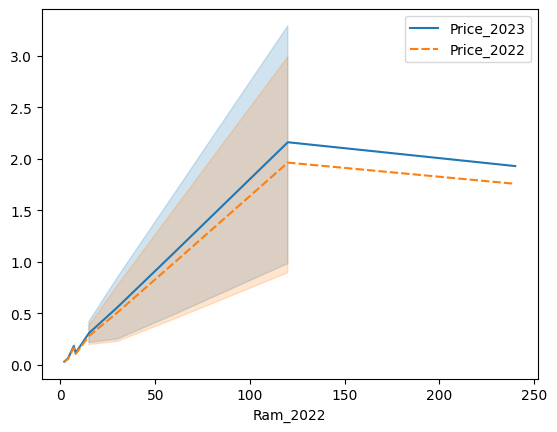

In [ ]:
sns.lineplot(data_compare[["Price_2023","Price_2022","Ram_2022"]].set_index("Ram_2022") )

In [ ]:
data[data["Provider"]=="Felcloud"][["Flavor","Ram","Vcpu","Disk","Price","Provider"]].sort_values(["Ram","Vcpu"])

,Flavor,Ram,Vcpu,Disk,Price,Provider
30,Atto.S,1,1,20,0.0070,Felcloud
31,Atto.M,2,1,50,0.0125,Felcloud
32,Atto.L,2,2,80,0.0270,Felcloud
33,Femto.S,2,4,120,0.0440,Felcloud
50,CPU.S,2,8,100,0.0900,Felcloud
34,Femto.M,4,2,130,0.0810,Felcloud
35,Femto.L,4,4,150,0.0960,Felcloud
36,Pico.S,4,6,200,0.1000,Felcloud
51,CPU.M,4,16,200,0.1800,Felcloud
37,Pico.M,6,4,220,0.1200,Felcloud
